### Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#import file
df = pd.read_csv(r"C:\Users\yarde\OneDrive\שולחן העבודה\Projects\Data\Superstore Sales Dataset.csv")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [96]:
#overview
df.info()
null_count = df['Postal Code'].isnull().sum()
print(null_count)

#fill 0 to NA
df['Postal Code'] = df['Postal Code'].fillna(0)
#change to int
df['Postal Code'] = df['Postal Code'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [97]:
df.describe()
# Check for duplicates
df.duplicated().sum()

0

### Customer Analysis

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


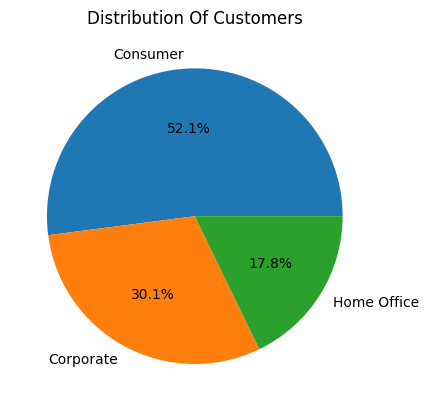

In [98]:
#segment
customers = df['Segment'].value_counts().reset_index()
customers.rename(columns = {"Segment":"Customer Type",'count':'Total Customers'}, inplace=True)
print(customers)

#plotting a pie chart
plt.pie(customers['Total Customers'], labels=customers['Customer Type'], autopct='%1.1f%%')
plt.title('Distribution Of Customers')
plt.show()

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


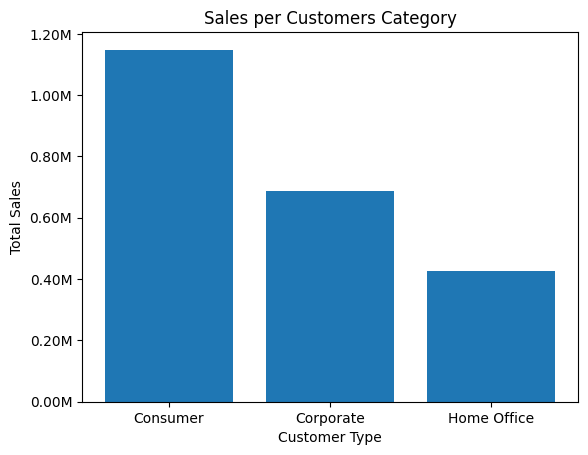

In [99]:
def millions_formatter(x, pos):
    return f'{x / 1e6:.2f}M'

sales_per_category = df.groupby("Segment")['Sales'].sum().reset_index()
sales_per_category.rename(columns={"Segment": "Customer Type", 'Sales': 'Total Sales'}, inplace=True)
print(sales_per_category)

#plotting a bar chart
plt.bar(sales_per_category['Customer Type'],sales_per_category['Total Sales'])
plt.title('Sales per Customers Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.gca().yaxis.set_major_formatter(millions_formatter)

plt.show()

In [100]:
#Customers Loyalty- With Most Orders
customer_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customer_order_freq.rename(columns={"Order ID":"Total Orders"}, inplace=True)
repeat_customers = customer_order_freq[customer_order_freq['Total Orders'] > 1]
customer_order_freq = customer_order_freq.sort_values(by='Total Orders',ascending =False)
customer_order_freq.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


In [101]:
#Most Profitable Customers - With Most Sales
customer_Sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
customer_Sales = customer_Sales.sort_values(by='Sales',ascending =False)
customer_Sales.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


### Shipping Analysis

        Ship Mode  Use Frequency
0  Standard Class           5859
1    Second Class           1902
2     First Class           1501
3        Same Day            538


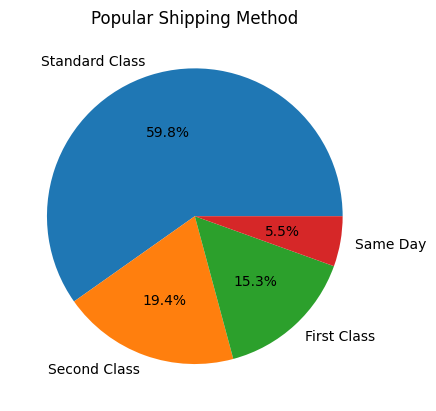

In [102]:
# Frequency use of shipping methos
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode.rename(columns = {'count':'Use Frequency'}, inplace=True)
print(shipping_mode)

#plotting a pie chart
plt.pie(shipping_mode['Use Frequency'], labels=shipping_mode['Ship Mode'], autopct='%1.1f%%')
plt.title('Popular Shipping Method')
plt.show()

### Geographical Analysis

In [103]:
# Customer By State
state = df['State'].value_counts().reset_index()
state.rename(columns = {'count':'Use Frequency'}, inplace=True)
print(state.head(10))

            State  Use Frequency
0      California           1946
1        New York           1097
2           Texas            973
3    Pennsylvania            582
4      Washington            504
5        Illinois            483
6            Ohio            454
7         Florida            373
8        Michigan            253
9  North Carolina            247


In [104]:
# Sales By State
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales',ascending =False)
state_sales.head(10).reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [105]:
#Customer By City
city = df['City'].value_counts().reset_index()
city.rename(columns = {'count':'Use Frequency'}, inplace=True)
print(city.head(10))

            City  Use Frequency
0  New York City            891
1    Los Angeles            728
2   Philadelphia            532
3  San Francisco            500
4        Seattle            426
5        Houston            374
6        Chicago            308
7       Columbus            221
8      San Diego            170
9    Springfield            161


In [106]:
#Sales By City
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
city_sales = city_sales.sort_values(by='Sales',ascending =False)
city_sales.head(10).reset_index(drop=True)

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


### Produt Analysis

In [108]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


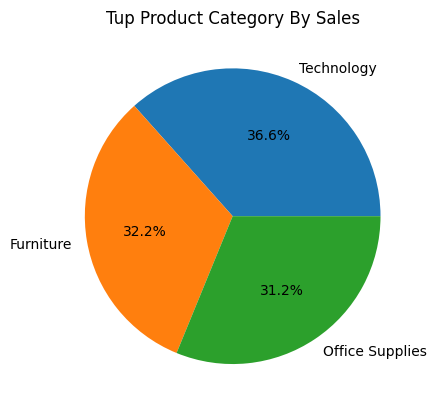

In [111]:
# Sales Per Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values('Sales', ascending=False)
category_sales

#plotting a pie chart
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%')
plt.title('Tup Product Category By Sales')
plt.show()

In [113]:
# Sales Per Sub-Category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
subcategory_sales = subcategory_sales.sort_values('Sales', ascending=False)
subcategory_sales.reset_index(drop=True)

,Sub-Category,Sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


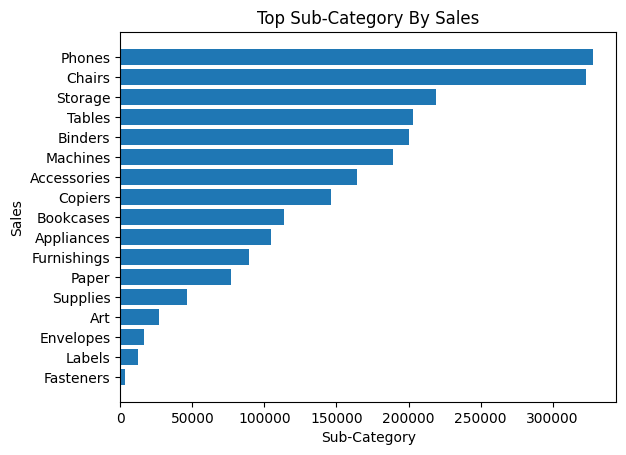

In [118]:
subcategory_sales.sort_values('Sales', inplace=True)

# plotting a bar chart
plt.barh(subcategory_sales['Sub-Category'],subcategory_sales['Sales'])
plt.title('Top Sub-Category By Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

### Sales Analysis

#### Yearly Sales

In [121]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales.rename(columns={'Order Date':'Year'}, inplace=True)
yearly_sales

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


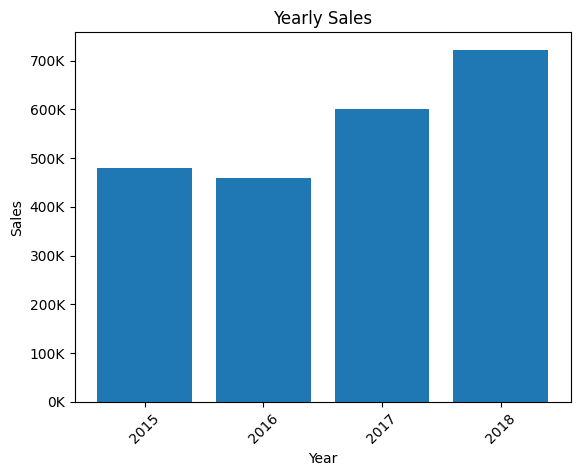

In [135]:
def thousands_formatter(x, pos):
    return f'{x / 1000:.0f}K'

# plotting a bar chart
plt.bar(yearly_sales['Year'], yearly_sales['Sales'])
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.xticks(yearly_sales['Year'],rotation = 45)
plt.gca().yaxis.set_major_formatter(thousands_formatter)

plt.show()

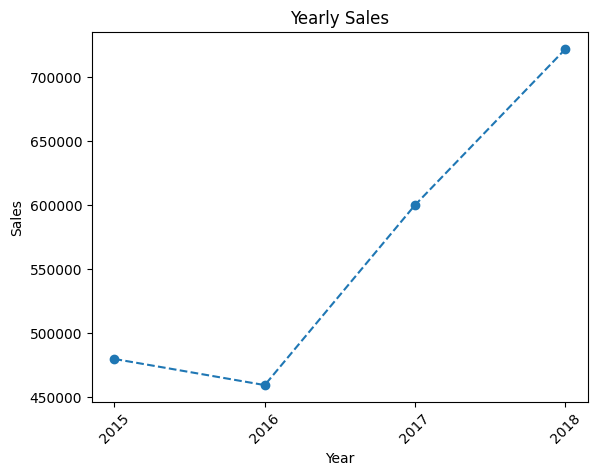

In [138]:
# plotting a line chart
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker ='o', linestyle='--')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.xticks(yearly_sales['Year'],rotation = 45)

plt.show()

#### Quarterly Sales

In [144]:
# year_2018_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = df.resample('QE', on='Order Date')['Sales'].sum().reset_index()
quarterly_sales.rename(columns={'Order Date':'Quarter'}, inplace = True)
quarterly_sales

,Quarter,Sales
0,2015-03-31,73931.3960
1,2015-06-30,85874.0936
2,2015-09-30,142522.6063
3,2015-12-31,177528.1122
4,2016-03-31,62357.6870
5,2016-06-30,87713.3730
6,2016-09-30,128560.2072
7,2016-12-31,180804.7382
8,2017-03-31,92686.3650
9,2017-06-30,135061.1610


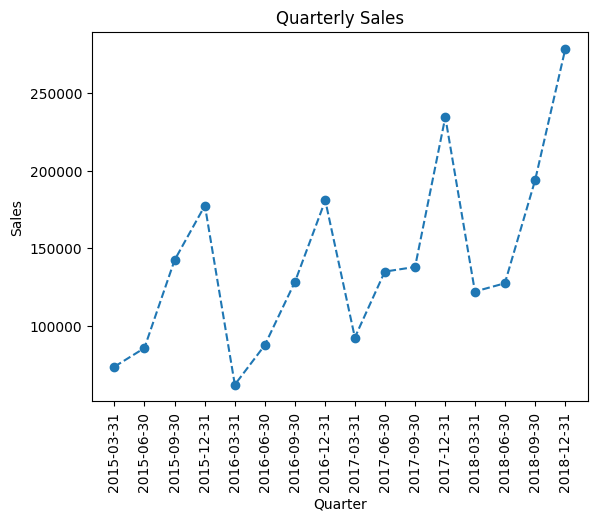

In [146]:
# plotting a line chart
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales'], marker ='o', linestyle='--')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.xticks(quarterly_sales['Quarter'], rotation = 90)

plt.show()

#### Monthly Sales for 2018

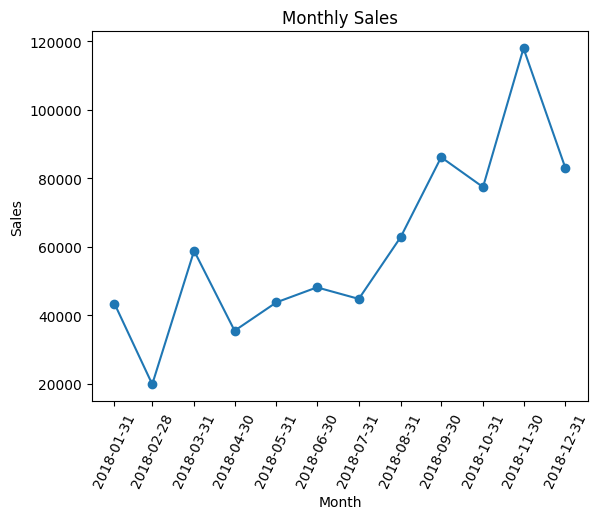

In [157]:
year_2018_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = year_2018_sales.resample('ME', on ='Order Date')['Sales'].sum().reset_index()
monthly_sales.rename(columns={'Order Date':'Month'}, inplace = True)

# plotting a line chart
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker ='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.xticks(monthly_sales['Month'], rotation = 65)

plt.show()